### **Graduate Admission Prediction Using ANN - Regression - Problem- GradAdmit-ANN-Predictor🎓📊**

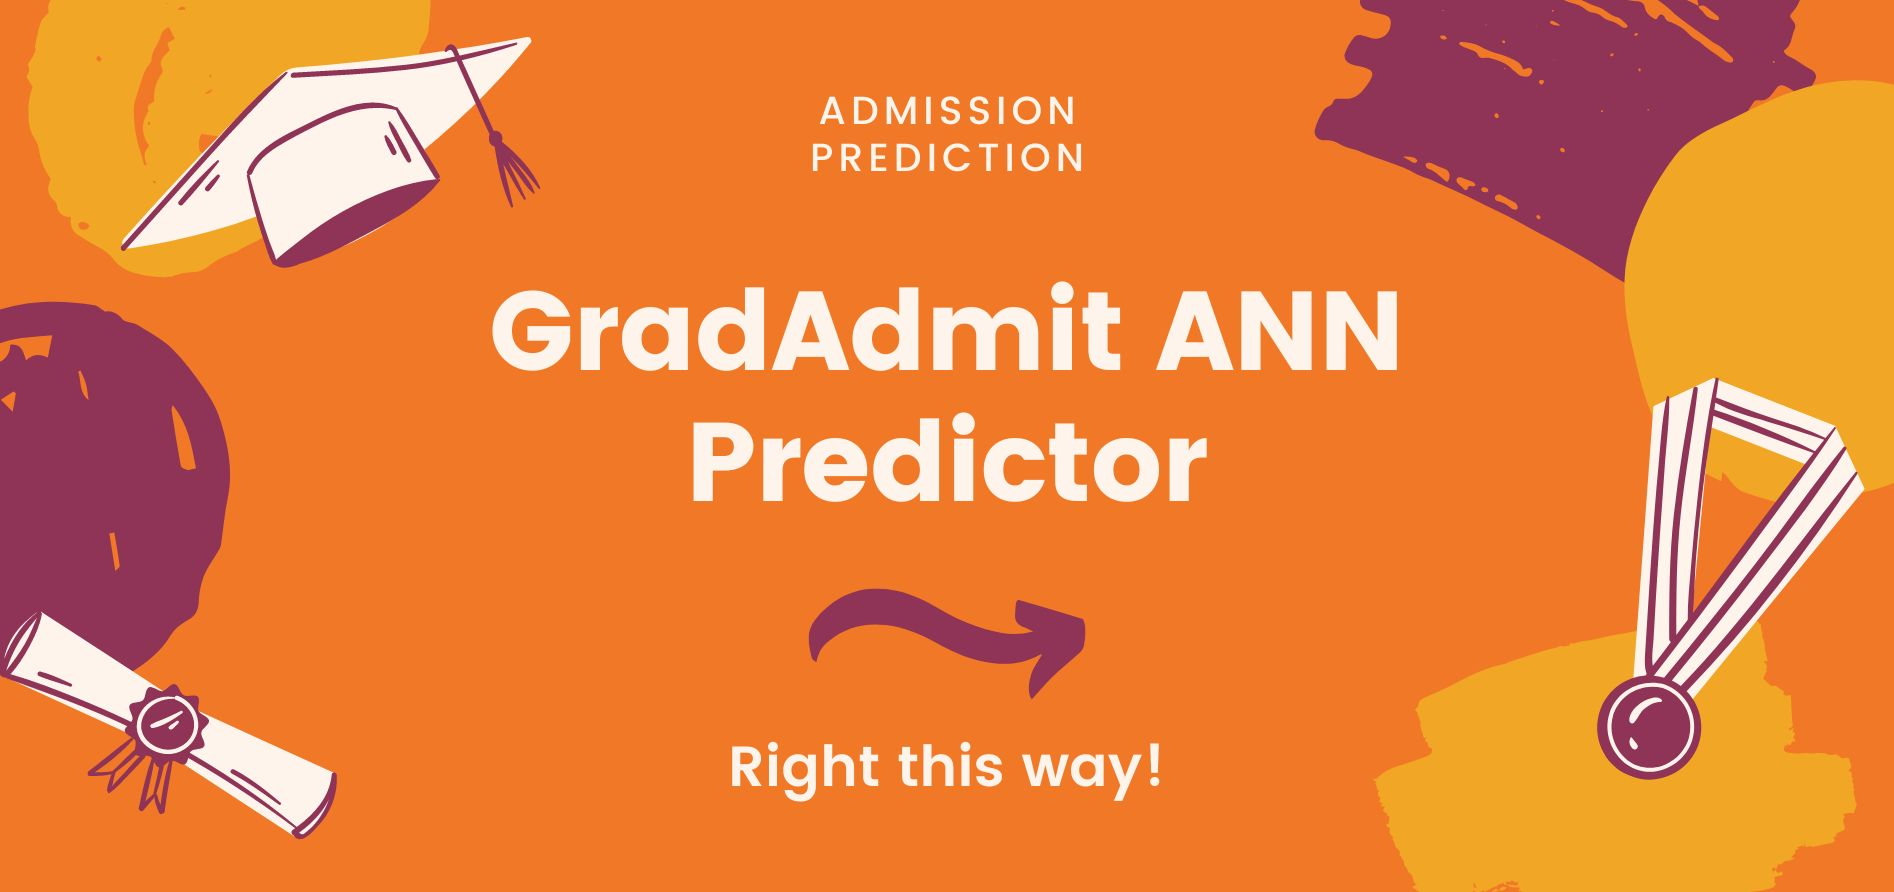

# **Unlock your future with GradAdmit-ANN-Predictor! 🚀🎯**

# **Libraries**

In [62]:
# importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# **Load and Read the Dataset**

In [63]:
# load the dataset
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict.csv")

In [64]:
# see the first five rows of df
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [65]:
# shape of df
df.shape

(400, 9)

In [66]:
# get information of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [67]:
# check duplicated rows in df
df.duplicated().sum()

0

In [68]:
# drop serial number column because it's not useful for us
df.drop(columns = ['Serial No.'], inplace = True)

# **Split the Dataset for train and test**

In [69]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [70]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [71]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [72]:
# split the X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [73]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
93,301,97,2,3.0,3.0,7.88,1
23,334,119,5,5.0,4.5,9.70,1
299,305,112,3,3.0,3.5,8.65,0
13,307,109,3,4.0,3.0,8.00,1
90,318,106,2,4.0,4.0,7.92,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [74]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

### **Apply Min Max Scaler Technique in to input features to standarized the data points**

In [75]:
min_max_scaler = MinMaxScaler()

X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [76]:
X_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [77]:
X_test_scaled

array([[ 0.44      ,  0.39285714,  0.5       ,  0.625     ,  0.71428571,
         0.58088235,  0.        ],
       [ 0.2       ,  0.28571429,  0.5       ,  0.25      ,  0.42857143,
         0.53676471,  1.        ],
       [ 0.68      ,  0.71428571,  0.75      ,  0.75      ,  0.57142857,
         0.57720588,  1.        ],
       [ 0.68      ,  0.53571429,  1.        ,  0.625     ,  0.71428571,
         0.53676471,  1.        ],
       [ 0.64      ,  0.64285714,  0.75      ,  0.75      ,  1.        ,
         0.70955882,  1.        ],
       [ 0.36      ,  0.5       ,  0.5       ,  0.5       ,  0.42857143,
         0.38235294,  0.        ],
       [ 0.4       ,  0.5       ,  0.25      ,  0.625     ,  0.28571429,
         0.41544118,  0.        ],
       [ 0.2       ,  0.35714286,  0.25      ,  0.125     ,  0.14285714,
         0.24632353,  0.        ],
       [ 0.4       ,  0.25      ,  0.25      ,  0.125     ,  0.14285714,
         0.03676471,  0.        ],
       [ 1.        ,  0.7142

# **Model - Building - Linear Regression - Model - ANN**

In [78]:
model = Sequential()

model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [79]:
# compilation of model
model.compile(loss='mean_squared_error', optimizer = 'Adam')

In [80]:
history = model.fit(X_train_scaled, y_train, epochs = 200, validation_split = 0.2)

Epoch 1/200
8/8 [==============================] - 1s 20ms/step - loss: 0.5735 - val_loss: 0.5705
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4996 - val_loss: 0.4950
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 0.4320 - val_loss: 0.4286
Epoch 4/200
8/8 [==============================] - 0s 4ms/step - loss: 0.3741 - val_loss: 0.3690
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 0.3216 - val_loss: 0.3162
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 0.2752 - val_loss: 0.2689
Epoch 7/200
8/8 [==============================] - 0s 5ms/step - loss: 0.2340 - val_loss: 0.2266
Epoch 8/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1966 - val_loss: 0.1886
Epoch 9/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1637 - val_loss: 0.1542
Epoch 10/200
8/8 [==============================] - 0s 5ms/step - loss: 0.1333 - val_loss: 0.1243
Epoch 11/200
8/8 [==========

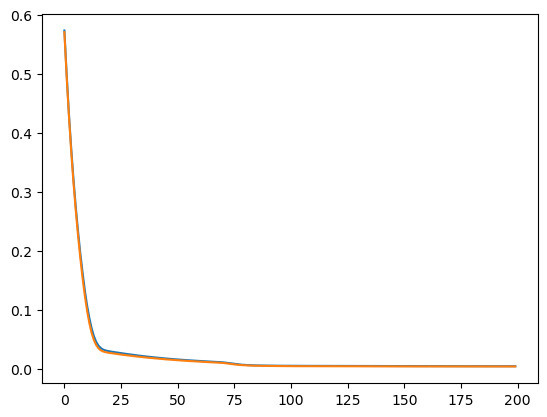

In [81]:
# plot the loss of train and test both
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# **Model - Prediction**

In [82]:
y_pred = model.predict(X_test_scaled)

3/3 [==============================] - 0s 2ms/step


In [83]:
y_pred[0]

array([0.7158327], dtype=float32)

# **Check Model R2 Score**

In [84]:
r2_score(y_test, y_pred)

0.8093041859123788

# **Thank You for Reading and Visiting my Notebook**